# Notebook to plot spectrum from jdx file

In [1]:
import os
import numpy as np
import jcamp
import matplotlib.pyplot as plt

### Define jdx parsing function

In [11]:
def parse_jdx(jdx_path):
    try:
        jdx_data = jcamp.jcamp_readfile(jdx_path)
        print(jdx_data)
        
        # Extract wavenumber and transmittance/absorbance
        x = np.array(jdx_data['x'])
        y = np.array(jdx_data['y'])
        print(x)
        print(y)
        
        # Validate arrays have matching dimensions
        if len(x) != len(y):
            print(f"Dimension mismatch in {jdx_path}: x shape {x.shape}, y shape {y.shape}")
            return None
        
        # Check if data is absorbance and convert to transmittance if needed
        y_units = jdx_data.get('yunits', '').upper()
        y_factor = jdx_data.get('yfactor', 1)
        # apply yfactor to y
        y = y * y_factor
        if 'TRANSMITTANCE' in y_units:
            print(f"Converting transmittance to absorbance for {jdx_path}")
            y = -np.log10(y + 1e-10)
        
        # convert xunits to wavenumbers
        x_units = jdx_data.get('xunits', '').upper()
        x_factor = jdx_data.get('xfactor', 1)
        # apply xfactor to x
        x = x * x_factor
        if 'MICROMETERS' in x_units:
            print(f'Converting micrometers to wavenumbers for {jdx_path}')
            x = 1e4 / x
        
        # set all negative values to 0 (negative values are non physical)
        y = np.clip(y, 0, None)

        # normalise the data to the max transmittance
        # y = y / np.max(y)
        y = np.clip(y, 0, 5)

        # check if the full range of wavenumbers has reasonable data
        reasonable = check_reasonable_data(x, y)
        if not reasonable:
            print(f"Data is not reasonable for {jdx_path}")
            return None
        
        # Get state information
        state = jdx_data.get('state', '')
        
        # Return the data in the expected format
        return {
            'wavenumber': x.tolist(),
            'transmittance': y.tolist(),
            'state': state
        }
    except Exception as e:
        print(f"Error processing {jdx_path}: {str(e)}")
        return None

def check_reasonable_data(x, y):
    return True

{'title': 'Silane, dimethyl-n-propyl-,', 'jcamp-dx': 4.24, 'data type': 'INFRARED SPECTRUM', 'class': 'COBLENTZ III', 'origin': 'DOW CORNING CORP.', 'owner': 'Copyright (C) 1987 by the Coblentz Society\nCollection (C) 2018 copyright by the U.S. Secretary of Commerce\non behalf of the United States of America. All rights reserved.', 'date': '1966/09/20', 'names': 'dimethyl(propyl)silane', 'cas registry no': '18143-31-2', 'molform': 'C5 H14 Si', 'bp': '73-74 C', 'source reference': 'COBLENTZ NO. 5618', '$nist source': 'COBLENTZ', '$nist image': 'cob5618', 'spectrometer/data system': 'PERKIN-ELMER 521 (GRATING)', 'instrument parameters': 'FILTERS AT 3150, 2500, 2000, 1150, 700, 410. GRATING CHANGES: 2000, 630', 'state': 'SOLUTION (10% CCl4 FOR 3800-1300, 2% CS2 FOR 1300-650, AND 10% CCl4 FOR 650-250)', 'path length': '0.012 CM, 0.011 CM, AND 0.009 CM', 'resolution': 2, 'xunits': '1/CM', 'yunits': 'TRANSMITTANCE', 'xfactor': 1.0, 'yfactor': 1, 'firstx': 264, 'lastx': 3814, 'firsty': 0.8869

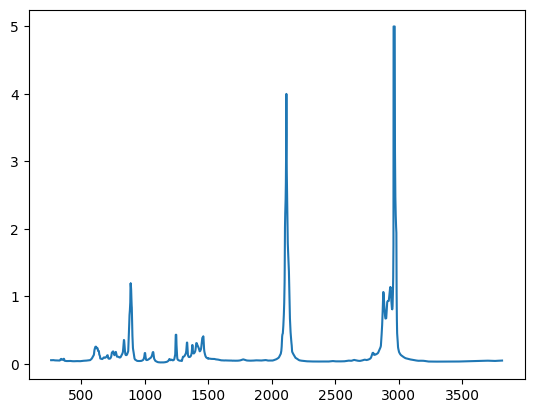

In [13]:
# cas_number = 'C6547531'
# cas_number = 'C81565186'
# cas_number = 'C89533459'
# cas_number = 'C1191679'
# cas_number = 'B6002511'
cas_number = 'C18143312'

jdx_data_path = '/Users/benji/phd/data/phd/attentivefp/jdx'

jdx_file_path = os.path.join(jdx_data_path, f'{cas_number}-IR.jdx')

ir_data = parse_jdx(jdx_file_path)
print(ir_data)

plt.plot(ir_data['wavenumber'], ir_data['transmittance'])
plt.show()